In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

'''tensorflow: Machine learning library.
matplotlib.pyplot: Plotting/visualization tool.
pandas: Data manipulation library.
seaborn: Enhanced data visualization.'''

'tensorflow: Machine learning library.\nmatplotlib.pyplot: Plotting/visualization tool.\npandas: Data manipulation library.\nseaborn: Enhanced data visualization.'

In [3]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Ti Laptop GPU
Using device: cuda


In [4]:
#training image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
'''
directory: Folder with data; if labels are "inferred", it must contain class subfolders.
labels: Options are "inferred" (from directory), None (no labels), or a custom label list matching files.
label_mode: Label encoding as "int", "categorical", "binary", or None.
class_names: Custom class order (used with inferred labels).
color_mode: Image color format - "grayscale", "rgb", or "rgba".
batch_size: Data batch size, default is 32; None yields individual samples.
image_size: Resized image dimensions, defaults to (256, 256).
shuffle: Whether to shuffle data (default: True).
seed: Random seed for shuffling.
validation_split: Data fraction for validation.
subset: "training", "validation", or "both" (used with validation_split).
interpolation: Resizing method (e.g., "bilinear").
follow_links: Follow symbolic links to subdirectories.
crop_to_aspect_ratio/pad_to_aspect_ratio: Resize while preserving aspect ratio, with cropping or padding.
data_format: "channel_last" or "channel_first".
verbose: Show class and file count (default: True).
'''

'\ndirectory: Folder with data; if labels are "inferred", it must contain class subfolders.\nlabels: Options are "inferred" (from directory), None (no labels), or a custom label list matching files.\nlabel_mode: Label encoding as "int", "categorical", "binary", or None.\nclass_names: Custom class order (used with inferred labels).\ncolor_mode: Image color format - "grayscale", "rgb", or "rgba".\nbatch_size: Data batch size, default is 32; None yields individual samples.\nimage_size: Resized image dimensions, defaults to (256, 256).\nshuffle: Whether to shuffle data (default: True).\nseed: Random seed for shuffling.\nvalidation_split: Data fraction for validation.\nsubset: "training", "validation", or "both" (used with validation_split).\ninterpolation: Resizing method (e.g., "bilinear").\nfollow_links: Follow symbolic links to subdirectories.\ncrop_to_aspect_ratio/pad_to_aspect_ratio: Resize while preserving aspect ratio, with cropping or padding.\ndata_format: "channel_last" or "chann

In [6]:
#validation image preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [7]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
validation_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
print(training_set.class_names)
print(validation_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [10]:
for x,y in training_set:
    print(x, x.shape) #x content
    print(y, y.shape) #y content
    break

tf.Tensor(
[[[[116.   105.   101.  ]
   [117.5  106.5  102.5 ]
   [110.25  99.25  95.25]
   ...
   [159.   154.   158.  ]
   [157.   152.   156.  ]
   [159.75 154.75 158.75]]

  [[129.25 118.25 114.25]
   [124.5  113.5  109.5 ]
   [116.75 105.75 101.75]
   ...
   [157.5  152.5  156.5 ]
   [161.5  156.5  160.5 ]
   [166.5  161.5  165.5 ]]

  [[134.   123.   119.  ]
   [122.25 111.25 107.25]
   [118.   107.   103.  ]
   ...
   [152.25 147.25 151.25]
   [157.5  152.5  156.5 ]
   [166.   161.   165.  ]]

  ...

  [[ 87.   117.    45.  ]
   [ 93.25 122.5   54.5 ]
   [ 97.25 125.75  63.25]
   ...
   [118.75 137.5   99.  ]
   [ 89.   108.5   62.25]
   [ 97.75 119.    63.25]]

  [[ 86.75 115.75  48.75]
   [ 83.   112.    45.75]
   [ 83.75 112.25  49.75]
   ...
   [111.   132.75 104.5 ]
   [ 97.75 121.25  81.25]
   [108.25 134.25  79.25]]

  [[ 96.25 126.25  56.25]
   [ 91.75 120.75  54.  ]
   [ 81.25 110.25  44.75]
   ...
   [143.   166.75 144.75]
   [119.25 145.25 109.25]
   [113.   141.5   8

In [11]:
'''
To avoid Overshooding
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting so increase number of neurons 0.0001
3. Add more convolution layer extract more feature from images there may be possibly that model unable 
to capture relevent feature or model is confusing due to lack of feature so feed with more feature.
'''

'\nTo avoid Overshooding\n1. Choose small learning rate default 0.001 we are taking 0.0001\n2. There may be chance of Underfitting so increase number of neurons 0.0001\n3. Add more convolution layer extract more feature from images there may be possibly that model unable \nto capture relevent feature or model is confusing due to lack of feature so feed with more feature.\n'

In [12]:
##Building Model

In [13]:
cnn = tf.keras.Sequential() # allows you to build a neural network by stacking layers sequentially, one after another

In [14]:
##Building Convolutional Layer1
cnn.add(tf.keras.layers.Input(shape=[128, 128, 3]))

# Add the rest of the layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.25)) #cut layers 25% for reduse overfitting

In [20]:
cnn.add(tf.keras.layers.Flatten()) #2D - 1D

In [21]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [23]:
#output layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [24]:
#compiling model
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

#Adam is an adaptive learning rate optimization algorithm that adjusts the learning rate during training for efficient convergence. It’s widely used due to its speed and performance.
#compares the model’s output probabilities with the true labels and computes the error.
#calculating the percentage of correct predictions.

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [26]:
#model training
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 193s 83ms/step - loss: 1.3307 - accuracy: 0.6086 - val_loss: 0.5436 - val_accuracy: 0.8335
Epoch 2/10
2197/2197 [==============================] - 169s 77ms/step - loss: 0.4260 - accuracy: 0.8659 - val_loss: 0.2473 - val_accuracy: 0.9205
Epoch 3/10
2197/2197 [==============================] - 166s 75ms/step - loss: 0.2581 - accuracy: 0.9163 - val_loss: 0.2506 - val_accuracy: 0.9201
Epoch 4/10
2197/2197 [==============================] - 165s 75ms/step - loss: 0.1805 - accuracy: 0.9414 - val_loss: 0.1707 - val_accuracy: 0.9468
Epoch 5/10
2197/2197 [==============================] - 166s 76ms/step - loss: 0.1358 - accuracy: 0.9554 - val_loss: 0.1306 - val_accuracy: 0.9579
Epoch 6/10
2197/2197 [==============================] - 171s 78ms/step - loss: 0.1087 - accuracy: 0.9644 - val_loss: 0.1265 - val_accuracy: 0.9587
Epoch 7/10
2197/2197 [==============================] - 173s 79ms/step - loss: 0.0852 - accuracy: 0.9712 - val_loss: 0

In [27]:
#model evaluvation

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "trained_model.h5"  # Store path and type
checkpoint = ModelCheckpoint(filepath, monitor="loss", verbose=1, save_best_only=True)
# verbose = display the description when it was saved
callbacks_list = [checkpoint]


In [29]:
train_loss,train_acc = cnn.evaluate(training_set)

2197/2197 [==============================] - 52s 23ms/step - loss: 0.0357 - accuracy: 0.9890


In [30]:
print(train_loss,train_acc)

0.03566275164484978 0.9890034794807434


In [31]:
val_loss,val_acc = cnn.evaluate(validation_set)

550/550 [==============================] - 14s 26ms/step - loss: 0.1296 - accuracy: 0.9619


In [32]:
print(val_loss,val_acc)

0.12959127128124237 0.9619280695915222


In [33]:
cnn.save("trained_model.keras")

In [34]:
training_history.history

{'loss': [1.3307100534439087,
  0.42601683735847473,
  0.2580741047859192,
  0.1804913729429245,
  0.13578350841999054,
  0.10866812616586685,
  0.08518434315919876,
  0.07115788757801056,
  0.06219543144106865,
  0.05697241425514221],
 'accuracy': [0.6086492538452148,
  0.865922212600708,
  0.9162814021110535,
  0.9413898587226868,
  0.9554022550582886,
  0.9643502235412598,
  0.9711785912513733,
  0.9767977595329285,
  0.9796002507209778,
  0.9816345572471619],
 'val_loss': [0.543607771396637,
  0.24725434184074402,
  0.2505597770214081,
  0.17065493762493134,
  0.1305733621120453,
  0.12654875218868256,
  0.14450472593307495,
  0.13404984772205353,
  0.14526526629924774,
  0.12959134578704834],
 'val_accuracy': [0.833541989326477,
  0.9204985499382019,
  0.9201001524925232,
  0.946790337562561,
  0.9578875303268433,
  0.9587411880493164,
  0.9557819366455078,
  0.9586842656135559,
  0.9576029777526855,
  0.9619280695915222]}

In [35]:
#Recording History
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

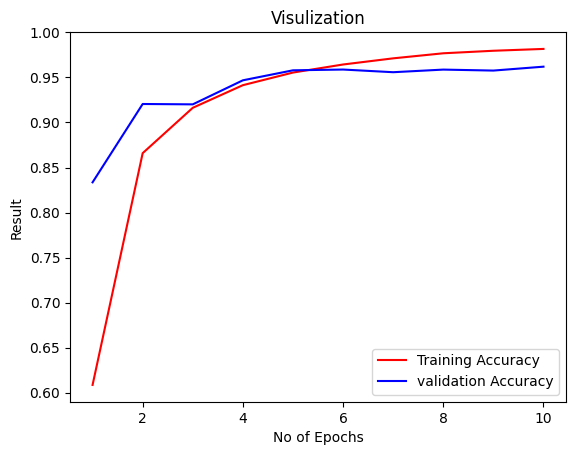

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Result")
plt.title("Visulization")
plt.legend()
plt.show()

In [37]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, #going seqentiolly top to bottom
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [39]:
y_pred = cnn.predict(test_set)
y_pred , y_pred.shape

550/550 [==============================] - 13s 23ms/step


(array([[9.9575955e-01, 3.0620638e-03, 4.6997311e-06, ..., 1.2345329e-09,
         3.0857248e-09, 2.0271495e-08],
        [9.9974948e-01, 1.0315507e-06, 3.8962088e-07, ..., 2.1663807e-10,
         2.2042210e-11, 1.4050709e-10],
        [9.9999058e-01, 8.8278266e-06, 9.1252225e-08, ..., 1.0740752e-13,
         1.7367567e-11, 6.0817756e-10],
        ...,
        [7.5129618e-11, 4.8156878e-13, 4.5696145e-09, ..., 8.8456380e-13,
         6.2580639e-12, 9.9999940e-01],
        [1.3540455e-10, 7.1656022e-13, 2.6426881e-09, ..., 4.3623711e-12,
         2.3868617e-11, 9.9999940e-01],
        [1.3412986e-12, 2.0620203e-12, 5.1877070e-12, ..., 3.3852570e-14,
         9.4400689e-11, 9.9999654e-01]], dtype=float32),
 (17572, 38))

In [40]:
predicted_categories = tf.argmax(y_pred , axis=1)

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
true_categories = tf.concat([y for x,y in test_set], axis=0)

In [43]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true = tf.argmax(true_categories , axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(f"Shape of Y_true: {len(Y_true)}")
print(f"Shape of predicted_categories: {len(predicted_categories)}")

Shape of Y_true: 17572
Shape of predicted_categories: 17572


In [47]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.95      1.00      0.97       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.89      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.98      0.

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_true,predicted_categories)

In [52]:
#Confusion Matrix Visulization

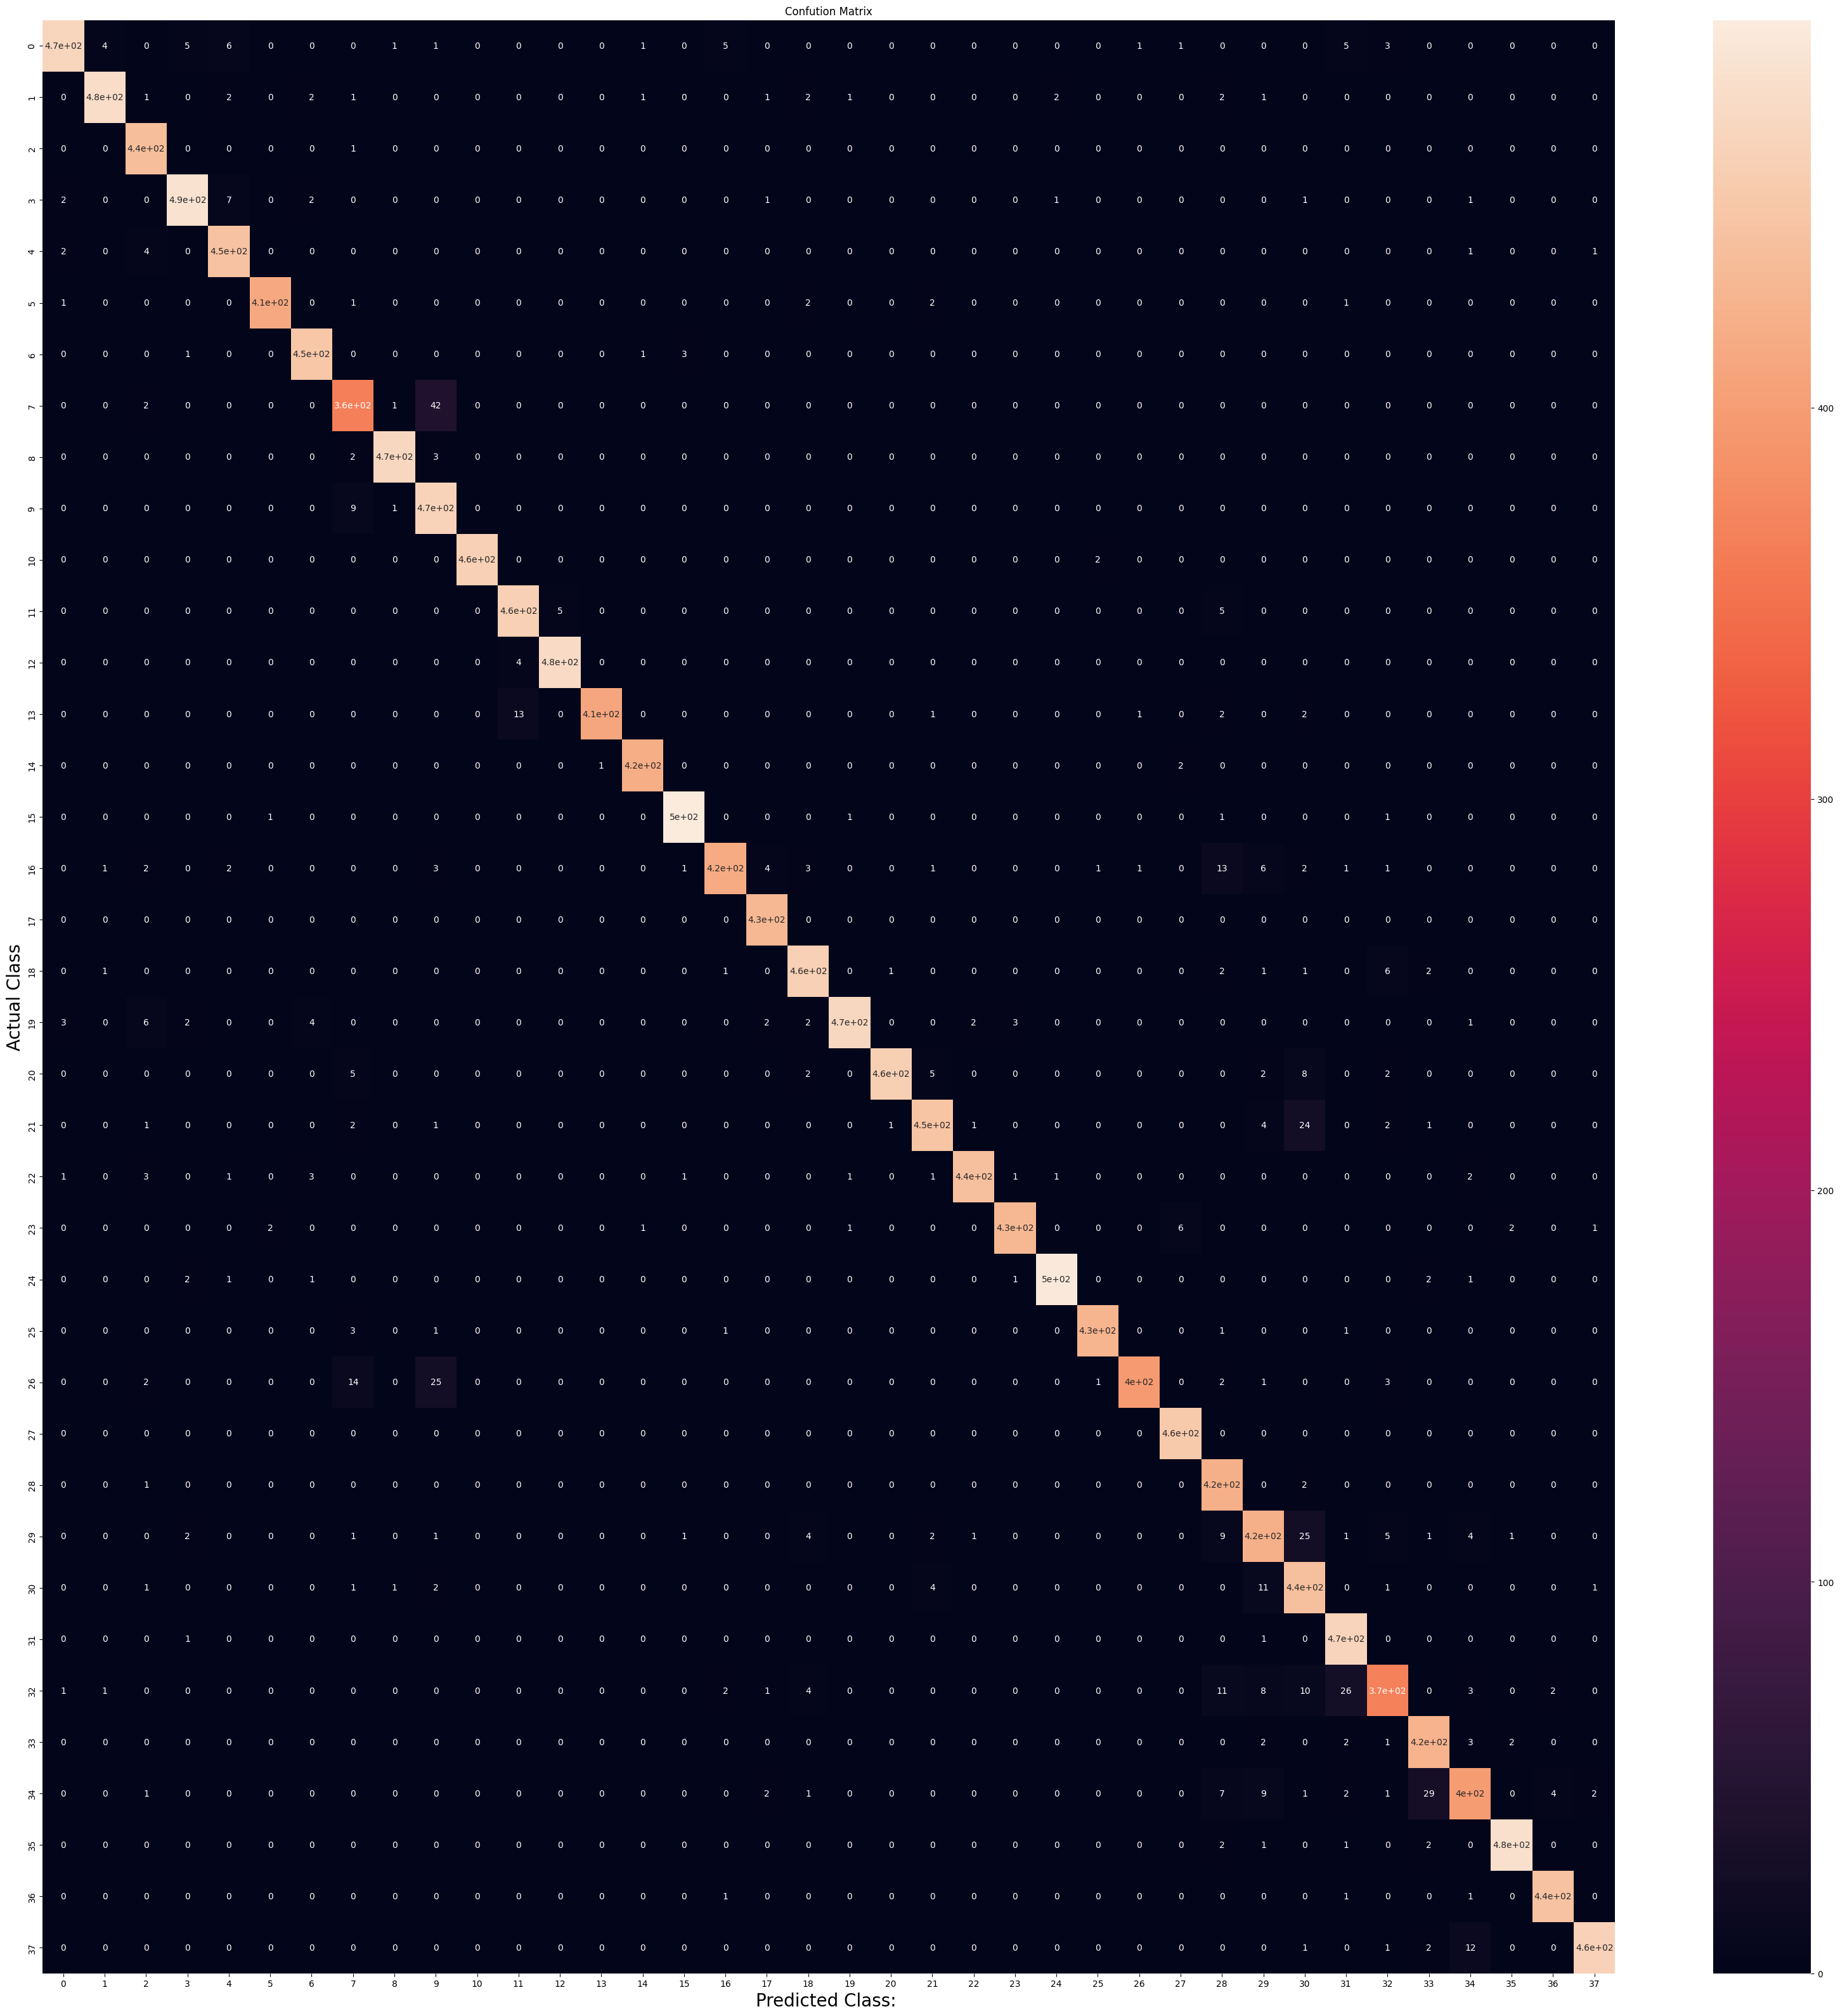

In [53]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class: ", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Confution Matrix")
plt.show()